In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

import six
import sys
sys.modules['sklearn.externals.six'] = six

from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

input_file = "C:/Users/pcpow/OneDrive/Desktop/ML-Poject_20230404/No_NaN_UPLOAD_CSV_EUR_USD_HIST_OHLCV_FIND_DIRECTION_20230405_5pm.csv"
df = pd.read_csv(input_file, header = 0)
# df.head()

d = {'HIGH': 1, 'LOW': 0}
e = {'DOWN TREND': 1, 'NO TREND': 2, 'UP TREND': 3}
f = {'BUY': 1, 'HOLD': 2, 'SELL': 3}

df['Tick Volume Group'] = df['Tick Volume Group'].map(d)
df['UPTREND / DOWN TREND 5'] = df['UPTREND / DOWN TREND 5'].map(e)
df['UPTREND / DOWN TREND 21'] = df['UPTREND / DOWN TREND 21'].map(e)
df['MANUAL BUY / SELL'] = df['MANUAL BUY / SELL'].map(f)

df.head()

features = list(df.columns[:18])
features

label = df['MANUAL BUY / SELL']
# label

y = label
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# df
# df.to_excel(r'C:/Users/pcpow/OneDrive/Desktop/ML-Poject_20230404/DF_BUY_SELL_EUR_USD.xlsx', index=False)

def switch(trade_action):
    if trade_action == 1:
        return "BUY"
    elif trade_action == 2:
        return "HOLD"
    elif trade_action == 3:
        return "SELL"

# prediction = clf.predict([[20230723,21.63,21.63,21.62,21.63,2456,0,0.01,21.625,0,0,0,1,1,21.486,3,21.43238095,3]])
# print(switch(prediction))

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# iterate through each row and get prediction
for ind in df.index:
    # df_input = [ind, df['Date'][ind], df['Open'][ind]]
    # print(df_input)
    df_input = [df['Date'][ind], 	df['Open'][ind], 	df['High'][ind], 	df['Low'][ind], 	df['Close'][ind], 	df[' Tick Volume '][ind], 	df['PX DIFF OPEN CLOSE'][ind], 	df['PX DIFF HIGH LOW'][ind], 	df['MID'][ind], 	df['P/L'][ind], 	df['% Change'][ind], 	df['% Change ABS'][ind], 	df['REVERSAL INDICATOR'][ind], 	df['Tick Volume Group'][ind], 	df[' 5 Day Moving Avg. (Close) '][ind], 	df['UPTREND / DOWN TREND 5'][ind], 	df[' 21 Day Moving Avg. (Close) '][ind], 	df['UPTREND / DOWN TREND 21'][ind]]
    print(df_input)
    prediction = clf.predict([df_input])
    # print(prediction) 
    print("Excel file Row: " + str(ind+2))
    print(switch(prediction))



[20140305, 20.56, 20.59, 20.52, 20.52, 1701, 0.04, 0.07, 20.555, 0.0, 0.57, 0.57, 0, 0, 20.446, 1, 20.32, 3]
Excel file Row: 2
HOLD
[20140306, 20.67, 20.67, 20.61, 20.63, 5042, 0.04, 0.06, 20.64, 0.0, 0.67, 0.67, 0, 1, 20.46, 3, 20.36857143, 3]
Excel file Row: 3
HOLD
[20140307, 20.6, 20.6, 20.48, 20.49, 57641, 0.11, 0.12, 20.54, 0.0, 0.92, 0.92, 0, 1, 20.466, 3, 20.41428571, 3]
Excel file Row: 4
HOLD
[20140310, 20.41, 20.49, 20.3, 20.49, 53896, -0.08, 0.19, 20.395, 0.0, -0.42, 0.42, 0, 1, 20.536, 1, 20.4452381, 3]
Excel file Row: 5
HOLD
[20140311, 20.49, 20.49, 20.3, 20.33, 14200, 0.16, 0.19, 20.395, 0.0, 0.84, 0.84, 0, 1, 20.492, 1, 20.45714286, 3]
Excel file Row: 6
HOLD
[20140312, 20.07, 20.27, 20.07, 20.27, 1510, -0.2, 0.2, 20.17, 0.0, -1.0, 1.0, 0, 0, 20.442, 1, 20.46952381, 1]
Excel file Row: 7
HOLD
[20140313, 20.12, 20.12, 19.9, 19.9, 7814, 0.22, 0.22, 20.01, 0.0, 1.0, 1.0, 0, 1, 20.296, 1, 20.45, 1]
Excel file Row: 8
HOLD
[20140314, 19.88, 19.92, 19.84, 19.88, 3180, 0.0, 0.08, 1

C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\pcpow\anaconda3\lib\site-packages\sklearn\base.py:4

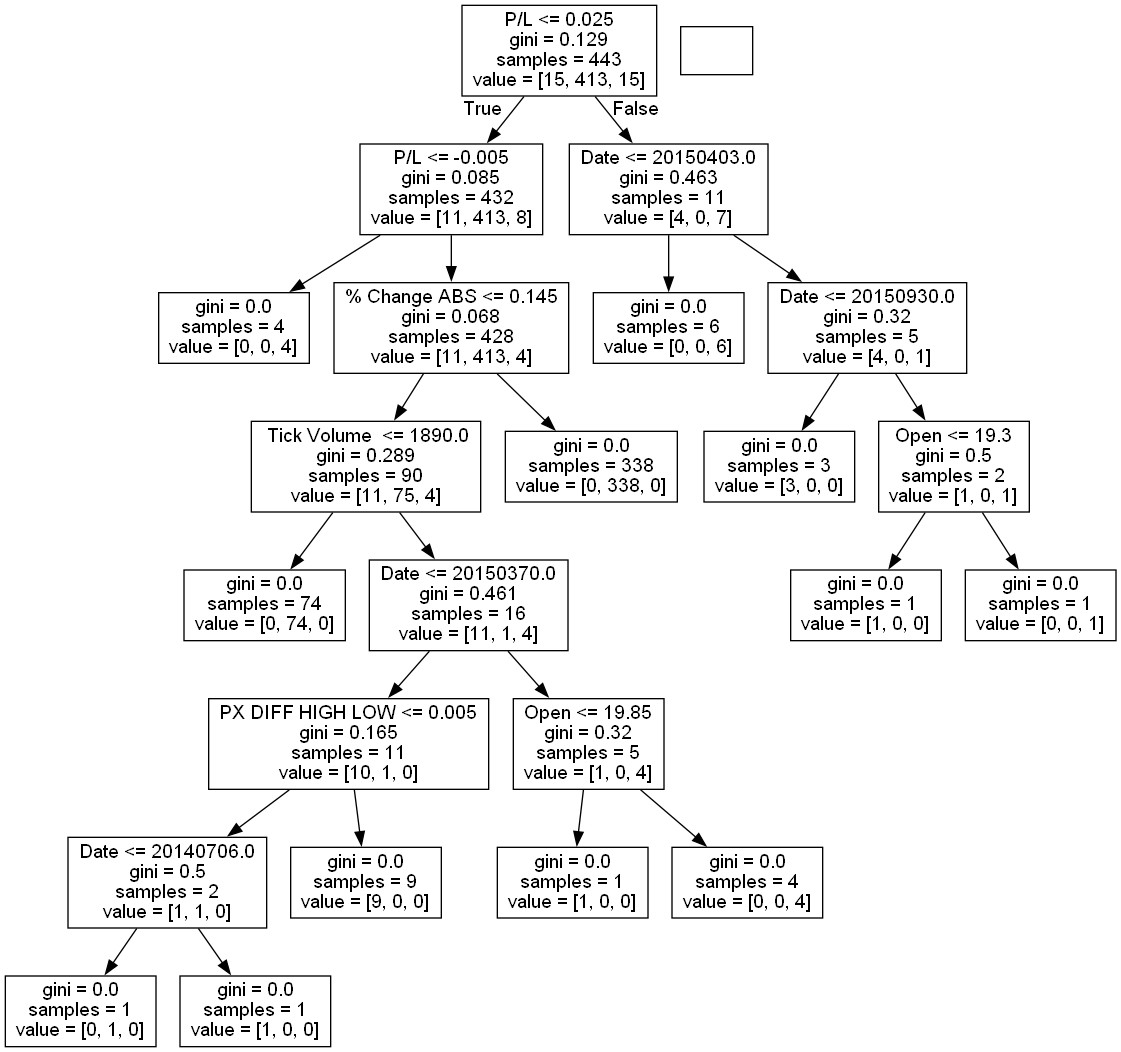

In [16]:
# Decision Tree    
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())